In [55]:
import pickle
import gzip
from matplotlib import pyplot as plt

import numpy as np

In [56]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, testing_data = pickle.load(f, encoding='latin1')
f.close()

# MNIST Preprocessing

In [57]:

training_image = np.array(training_data[0])
training_target = np.array(training_data[1])
validation_image = np.array(validation_data[0])
validation_target = np.array(validation_data[1])
training_image=np.concatenate((training_image, validation_image), axis=0)
training_target=np.concatenate((training_target, validation_target), axis=0)
testing_image = np.array(testing_data[0])
testing_target = np.array(testing_data[1])

#training_image.flatten()
print("Training image shape: "+str(training_image.shape))
print("Training target shape: "+str(training_target.shape))
print()
print("Validation image shape: "+str(validation_image.shape))
print("Validation target shape: "+str(validation_target.shape))
print()

print("Testing image shape: "+str(testing_image.shape))
print("Testing target shape: "+str(testing_target.shape))




Training image shape: (60000, 784)
Training target shape: (60000,)

Validation image shape: (10000, 784)
Validation target shape: (10000,)

Testing image shape: (10000, 784)
Testing target shape: (10000,)


# USPS Data Preprocessing

In [106]:
from PIL import Image
import os
import numpy as np

USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))
            USPSMat.append(imgdata)
            USPSTar.append(j)

USPS_image_np = np.asarray(USPSMat)
USPS_tar_np = np.asarray(USPSTar)
usps_testing_target_hot_vector2 = np.copy(USPS_tar_np)
usps_testing_target_hot_vector = []
for val in usps_testing_target_hot_vector2:
    usps_testing_target_hot_vector.append(listed[val])
usps_testing_target_hot_vector_np = np.copy(usps_testing_target_hot_vector)
print("USPS Preprocessing done")
print()
print()
print()

USPS Preprocessing done





In [58]:
listed = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

## Training Target one-hot vectorization


In [59]:
training_target_hot_vector2 = np.copy(training_target)
training_target_hot_vector = []
for val in training_target_hot_vector2:
    training_target_hot_vector.append(listed[val])
training_target_hot_vector_np = np.copy(training_target_hot_vector)
print("Done")

Done


## Testing Target one-hot vectorization

In [60]:
testing_target_hot_vector2 = np.copy(testing_target)
testing_target_hot_vector = []
for val in testing_target_hot_vector2:
    testing_target_hot_vector.append(listed[val])
testing_target_hot_vector_np = np.copy(testing_target_hot_vector)
print("Done")

Done


In [61]:
def logistic_regression(features, target, num_steps):
    
    weights = []
    
    scores = np.zeros((10))
    ypreds = np.zeros((10))
    
    for i in range(10):
        weightval = np.zeros(features.shape[1])
        weights.append(weightval)
    

    for step in range(num_steps):
        
        feature_current = features[step % 50000]
        target_current = target[step % 50000]
        #feature_current = features
        #target_current = target

        sum = 0
        for targnum in range(10):
            bias = 0
            #print(weights[targnum].T.shape)
            #print(feature_current.shape)
            #print(scores[targnum].shape)
            
            scores[targnum] = np.dot(weights[targnum].T, feature_current) + bias            
            sum = sum + np.exp(scores[targnum])
            
        for targnum in range(10):
            ypreds[targnum] = (np.exp(scores[targnum])) / (sum)

        
        lr = 0.001
        for targnum in range(10):
            
            val = (ypreds[targnum] - target_current[targnum]) * feature_current

            
            weights[targnum] = weights[targnum] - (lr * val)
        
    print("Logistic Regression weights generated.")
    return weights

In [62]:
#weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     #num_steps = 50000, learning_rate = 5e-5, add_intercept=True)
print("Please wait for 1-3 mins")
weights = logistic_regression(training_image, training_target_hot_vector_np,
                     num_steps = 300000)

print("Done")

Please wait for 1-3 mins
Logistic Regression weights generated.
Done


## Logistic Regression Target Prediction

In [63]:
#Prediction
def logistic_prediction(features, target, weights):
    #weights = []
    num_steps=len(target)
    scores=np.zeros((10))
    ypreds=np.zeros((10))
    
    for i in range(10):
        weightval = np.zeros(features.shape[1])
        weights.append(weightval)

    tot=0
    correct=0
    wrong=0
    confusion_matrix=np.zeros((10,10))
    log_reg_pred =[]

    for step in range(num_steps):
        feature_current = features[step]
        target_current = target[step]        
        sum=0
        
        for targnum in range(10):
            bias=0.0
            scores[targnum] = np.dot(weights[targnum].T, feature_current)+bias            
            sum=sum+np.exp(scores[targnum])

        for targnum in range(10):
            ypreds[targnum]=(np.exp(scores[targnum]))/(sum)
        
        
        maxargg = np.argmax(ypreds)
        log_reg_pred.append(maxargg)                
        targmaxargg = np.argmax(target_current)        
        if(maxargg==targmaxargg):
            correct=correct+1
        else:
            wrong=wrong+1
                 
        tot=tot+1        
        confusion_matrix[maxargg][targmaxargg]+=1
        
    np.set_printoptions(precision=0, suppress=True)
    print("Vivek Adithya Srinivasa Raghavan")
    print("Logistic Regression Accuracy :")
    print("Total count:"+str(tot))
    print("Correct count:"+str(correct))
    print("Wrong count:"+str(wrong))
    print("Accuracy :"+str((correct/tot)*100)+" %")
    print("Confusion Matrix : ")
    print("Top X axis is ideal expected output label(target)")
    print("Left Y axis is actual predicted output label")    
    print(confusion_matrix)
    print()
    print()
    print()
    return log_reg_pred

# Logistic Regression Prediction and results for MNIST

In [64]:
log_reg_pred = logistic_prediction(testing_image, testing_target_hot_vector_np, weights)

Vivek Adithya Srinivasa Raghavan
Logistic Regression Accuracy :
Total count:10000
Correct count:9168
Wrong count:832
Accuracy :91.67999999999999 %
Confusion Matrix : 
Top X axis is ideal expected output label(target)
Left Y axis is actual predicted output label
[[ 955.    0.    5.    3.    1.   11.   10.    1.    6.    9.]
 [   0. 1109.    8.    0.    3.    4.    3.   11.   10.    7.]
 [   1.    2.  915.   23.    4.    5.    3.   22.    7.    3.]
 [   2.    2.   15.  921.    1.   45.    2.    9.   30.   11.]
 [   0.    0.   13.    0.  903.    8.   11.    6.    8.   32.]
 [   6.    2.    4.   26.    0.  760.   12.    0.   30.   11.]
 [  10.    4.   14.    2.   11.   12.  913.    0.   12.    0.]
 [   1.    2.   13.   10.    2.    8.    1.  940.   13.   25.]
 [   5.   14.   37.   15.    8.   30.    3.    3.  846.    5.]
 [   0.    0.    8.   10.   49.    9.    0.   36.   12.  906.]]





# Logistic Regression prediction results using USPS Data

In [65]:
usps_log_reg_pred = logistic_prediction(USPS_image_np, usps_testing_target_hot_vector_np, weights)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


Vivek Adithya Srinivasa Raghavan
Logistic Regression Accuracy :
Total count:19999
Correct count:5968
Wrong count:14031
Accuracy :29.84149207460373 %
Confusion Matrix : 
Top X axis is ideal expected output label(target)
Left Y axis is actual predicted output label
[[ 833.  223.  411.  254.   98.  329.  667.  276.  377.   81.]
 [   6.  393.   75.    9.  109.   35.   17.  279.   43.  242.]
 [ 312.  231. 1187.  437.   73.  362.  690.  421.  290.  234.]
 [  40.  398.   96. 1101.  160.  345.   72.  497.  303.  648.]
 [ 299.  361.   42.   10. 1059.   84.  116.   64.  140.  188.]
 [ 127.   72.   70.  123.  140.  754.  141.   87.  514.  129.]
 [  11.   20.   26.    4.   24.   24.  237.   15.   62.   11.]
 [  76.  146.   42.   27.   96.   41.   16.  166.   40.  230.]
 [ 166.  151.   30.   28.  207.   16.   18.  162.  187.  186.]
 [ 130.    5.   20.    7.   34.   10.   26.   33.   44.   51.]]





# SVM and Random Forests

In [12]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import fetch_mldata
'''mnist = fetch_mldata('MNIST original')
n_train = 60000
n_test = 10000
indices = np.arange(len(mnist.data))
train_idx = np.arange(0,n_train)
test_idx = np.arange(n_train, n_train+n_test)
X_train, y_train = mnist.data[train_idx], mnist.target[train_idx]
X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]'''
print("Done")

Done


# SVM for MNIST

### SVM Accuracy and confusion matrix

In [15]:
def svm_predictor(svm_1_3_pred, testing_target=testing_target):
    wrong=0
    correct=0
    tot=0
    svm_confusion_matrix=np.zeros((10,10))
    for val, tar in zip(svm_1_3_pred,testing_target):
        #print("Pred : "+str(val)+" Actual : "+str(tar))
        tot+=1
        svm_confusion_matrix[int(val)][int(tar)]+=1
        if (val==tar):
            correct+=1
        else:
            wrong+=1
    print("Total count:"+str(tot))
    print("Correct count:"+str(correct))
    print("Wrong count:"+str(wrong))
    print("Accuracy :"+str((correct/tot)*100)+" %")        
    np.set_printoptions(precision=0, suppress=True)    
    print(svm_confusion_matrix)

### 1.  For Gamma=0.05 and rbf as kernel

In [127]:
print("Start")
classifier1_1 = SVC(kernel='rbf', gamma = 0.05)
classifier1_1.fit(training_image, training_target)
print(" SVM Fitting for Gamma=0.05 and rbf as kernel COMPLETED.")


Start
 SVM Fitting for Gamma=0.05 and rbf as kernel COMPLETED.


In [128]:
svm_1_1_pred= classifier1_1.predict(testing_image)
svm_predictor(svm_1_1_pred)
print("done")

Total count:10000
Correct count:9826
Wrong count:174
Accuracy :98.26 %
[[ 972.    0.    4.    0.    0.    2.    4.    0.    2.    3.]
 [   0. 1126.    0.    0.    0.    0.    2.    3.    0.    3.]
 [   1.    3. 1014.    2.    3.    0.    0.   10.    1.    2.]
 [   0.    1.    0.  996.    0.    6.    0.    1.    4.    7.]
 [   0.    0.    1.    0.  965.    1.    2.    1.    0.   10.]
 [   2.    1.    0.    2.    0.  877.    3.    0.    3.    2.]
 [   2.    1.    0.    0.    4.    2.  946.    0.    0.    1.]
 [   1.    1.    6.    6.    0.    1.    0. 1003.    3.    6.]
 [   2.    2.    7.    4.    2.    2.    1.    2.  958.    6.]
 [   0.    0.    0.    0.    8.    1.    0.    8.    3.  969.]]
done


### 2.  For Gamma as default and rbf as kernel

In [125]:
classifier1_2 = SVC(kernel='rbf')
classifier1_2.fit(training_image, training_target)
print("SVM Fitting for Gamma as default and rbf as kernel COMPLETED.")

SVM Fitting for Gamma as default and rbf as kernel COMPLETED.


In [126]:
svm_1_2_pred= classifier1_2.predict(testing_image)
svm_predictor(svm_1_2_pred)
print("done")

Total count:10000
Correct count:9443
Wrong count:557
Accuracy :94.43 %
[[ 967.    0.    9.    1.    1.    7.    9.    2.    4.    8.]
 [   0. 1121.    1.    1.    1.    4.    3.   13.    7.    7.]
 [   2.    2.  961.   15.    7.    5.    4.   22.    7.    0.]
 [   0.    2.    9.  951.    0.   32.    1.    5.   14.   12.]
 [   0.    0.   10.    1.  938.    7.    5.    8.    8.   31.]
 [   5.    1.    1.   15.    0.  808.    9.    1.   23.    6.]
 [   4.    4.   13.    1.    7.   12.  926.    0.   10.    1.]
 [   1.    1.    9.   10.    2.    2.    0.  955.    6.   13.]
 [   1.    4.   17.   11.    2.   10.    1.    3.  892.    7.]
 [   0.    0.    2.    4.   24.    5.    0.   19.    3.  924.]]
done


### 3.  For Gamma as default and Linear kernel

In [13]:
classifier1_3 = SVC(kernel='linear')
classifier1_3.fit(training_image, training_target)
print("SVM Fitting for Gamma as default and Linear kernel COMPLETED.")

SVM Fitting for Gamma as default and Linear kernel COMPLETED.


In [16]:
svm_1_3_pred= classifier1_3.predict(testing_image)
svm_predictor(svm_1_3_pred)
print("done")

Total count:10000
Correct count:9403
Wrong count:597
Accuracy :94.03 %
[[ 957.    0.    8.    4.    1.   10.    9.    1.    8.    7.]
 [   0. 1122.    6.    3.    1.    4.    2.    8.    4.    7.]
 [   4.    3.  967.   16.   10.    3.   13.   21.    6.    2.]
 [   1.    2.   11.  947.    1.   36.    1.   10.   25.   11.]
 [   1.    0.    3.    1.  942.    6.    6.    8.    7.   33.]
 [   6.    1.    3.   15.    2.  803.   16.    1.   26.    4.]
 [   9.    2.    7.    0.    4.   13.  909.    0.    6.    0.]
 [   1.    1.    8.    9.    2.    1.    1.  957.    7.   18.]
 [   0.    4.   17.   13.    3.   14.    1.    3.  877.    5.]
 [   1.    0.    2.    2.   16.    2.    0.   19.    8.  922.]]
done


## SVM for USPS Data

### Linear Kernel and Default Gamma

In [24]:
usps_svm_1_3_pred= classifier1_3.predict(USPS_image_np)
svm_predictor(usps_svm_1_3_pred, USPS_tar_np )
print("done")

Total count:19999
Correct count:5885
Wrong count:14114
Accuracy :29.42647132356618 %
[[ 556.  115.  237.   99.   64.  110.  251.   94.  227.   26.]
 [   1.  171.   24.   28.    6.    8.    5.   26.    2.   18.]
 [ 406.  520. 1181.  307.  200.  642.  805.  123.  242.  153.]
 [ 221.  339.  185. 1079.  148.  380.  107.  771.  611.  717.]
 [ 138.  297.   34.    8.  791.   39.   46.   42.   89.  106.]
 [ 157.   94.  130.  321.  103.  542.  130.   92.  313.   30.]
 [  88.   34.   95.   11.   16.   40.  591.   13.   83.    6.]
 [ 125.  203.   14.   17.  302.   19.   13.  448.   41.  420.]
 [  50.  193.   87.  115.  263.  190.   13.  348.  349.  347.]
 [ 258.   34.   12.   15.  107.   30.   39.   43.   43.  177.]]
done


# Random Forests

In [34]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
'''from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
n_train = 60000
n_test = 10000
indices = np.arange(len(mnist.data))
train_idx = np.arange(0,n_train)
test_idx = np.arange(n_train, n_train+n_test)
X_train, y_train = mnist.data[train_idx], mnist.target[train_idx]
X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]'''
print("Done")


Done


In [35]:
print("Please wait for 4 mins, generating Random Forest model with 200 trees")
classifier2 = RandomForestClassifier(n_estimators=200)
classifier2.fit(training_image, training_target)
print("Done")

Done


## MNIST Random Forests Results

In [37]:
RF_preds = classifier2.predict(testing_image)
#usps_RF_preds = classifier2.predict(USPS_image_np)


def rf_predictor(RF_preds, testing_target=testing_target):
    wrong=0
    correct=0
    tot=0
    rf_confusion_matrix=np.zeros((10,10))


    for ele, tar in zip(RF_preds[:10000], testing_target[:10000]):
        tot+=1
        #print("Predicted: "+str(ele)+"  "+"Actual: "+str(tar))
        #print(int(ele))
        rf_confusion_matrix[int(ele)][int(tar)]+=1
        if (ele==tar):
            correct+=1
        else:
            wrong+=1
    #for row in rf_confusion_matrix:
        '''for col in row:
            col=int(col)'''
    print("Random Forests Result")
    print("Total count:"+str(tot))
    print("Correct count:"+str(correct))
    print("Wrong count:"+str(wrong))
    print("Accuracy :"+str((correct/tot)*100)+" %")        
    np.set_printoptions(precision=0, suppress=True)
    #rf_confusion_matrix.astype(int)
    print(rf_confusion_matrix)
    
rf_predictor(RF_preds)
#rf_predictor(usps_RF_preds, USPS_tar_np)

Random Forests Result
Total count:10000
Correct count:9701
Wrong count:299
Accuracy :97.00999999999999 %
[[ 970.    0.    6.    1.    1.    2.    5.    2.    4.    6.]
 [   1. 1123.    0.    0.    0.    0.    3.    2.    0.    5.]
 [   0.    3.  999.   10.    2.    0.    1.   18.    6.    1.]
 [   0.    3.    6.  969.    0.   10.    0.    1.   10.   10.]
 [   0.    0.    3.    0.  952.    2.    4.    1.    4.    8.]
 [   3.    2.    0.    9.    0.  863.    4.    0.    4.    3.]
 [   3.    2.    4.    0.    4.    5.  937.    0.    3.    1.]
 [   1.    0.    8.    9.    0.    2.    0.  992.    3.    4.]
 [   2.    1.    6.    9.    3.    5.    4.    3.  930.    5.]
 [   0.    1.    0.    3.   20.    3.    0.    9.   10.  966.]]


## USPS Random Forests results

In [44]:
usps_RF_preds = classifier2.predict(USPS_image_np)
rf_predictor(usps_RF_preds, USPS_tar_np)

Random Forests Result
Total count:10000
Correct count:4820
Wrong count:5180
Accuracy :48.199999999999996 %
[[ 637.   46.   88.   32.   15.    0.    0.    0.    0.    0.]
 [  11.  562.   31.    7.  200.    0.    0.    0.    0.    0.]
 [ 286.  132. 1270.   97.   49.    0.    0.    0.    0.    0.]
 [  57.  117.   87. 1274.   32.    0.    0.    0.    0.    0.]
 [ 415.   52.   49.   57. 1076.    0.    0.    0.    0.    0.]
 [ 150.   93.  201.  333.  180.    1.    0.    0.    0.    0.]
 [  76.   30.   14.    3.   17.    0.    0.    0.    0.    0.]
 [  99.  953.  253.  176.  387.    0.    0.    0.    0.    0.]
 [   1.   13.    3.    3.   24.    0.    0.    0.    0.    0.]
 [ 268.    2.    3.   18.   20.    0.    0.    0.    0.    0.]]




# DNN Implementation



In [104]:
import keras
from keras.layers import Dense
from keras.models import Sequential
num_classes=10
image_vector_size=28*28
x_train=training_image
y_train=training_target
x_test= testing_image
y_test= testing_target
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
usps_x_test = USPS_image_np.reshape(USPS_image_np.shape[0], image_vector_size)
usps_y_test = keras.utils.to_categorical(USPS_tar_np, num_classes)
image_size = 784 

In [105]:
print("Please wait for 6-8 mins for DNN model training for epochs=30")
model = Sequential()
model.add(Dense(units=200, activation='relu', input_shape=(image_size,)))
#model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=True,validation_split=.1)
loss,accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Loss "+str(loss))
print("Evaluation/testing accuracy "+str(accuracy*100))

Please wait for 6-8 mins for DNN model training for epochs=30
Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 11s 203us/step - loss: 0.3499 - acc: 0.9020 - val_loss: 0.1548 - val_acc: 0.9577
Epoch 2/25
54000/54000 [==============================] - 11s 206us/step - loss: 0.1547 - acc: 0.9552 - val_loss: 0.1208 - val_acc: 0.9685
Epoch 3/25
54000/54000 [==============================] - 10s 188us/step - loss: 0.1084 - acc: 0.9683 - val_loss: 0.0938 - val_acc: 0.9752
Epoch 4/25
54000/54000 [==============================] - 11s 197us/step - loss: 0.0811 - acc: 0.9769 - val_loss: 0.0864 - val_acc: 0.9748
Epoch 5/25
54000/54000 [==============================] - 10s 191us/step - loss: 0.0635 - acc: 0.9815 - val_loss: 0.0798 - val_acc: 0.9782
Epoch 6/25
54000/54000 [==============================] - 11s 207us/step - loss: 0.0514 - acc: 0.9854 - val_loss: 0.0732 - val_acc: 0.9792
Epoch 7/25
54000/54000 [==============================]

In [115]:
import numpy as np
DNN_preds = model.predict(x_test)
def dnn_tester(DNN_preds=DNN_preds, y_test=y_test):
    wrong=0
    correct=0
    tot=0
    DNN_confusion_matrix=np.zeros((10,10))
    for ele, tar in zip(DNN_preds, y_test):
        tot+=1
        #print("Predicted: "+str(np.argmax(ele))+"  "+"Actual: "+str(np.argmax(tar)))
        ele=np.argmax(ele)
        tar=np.argmax(tar)
        #print(int(ele))
        DNN_confusion_matrix[int(ele)][int(tar)]+=1
        if (ele==tar):
            correct+=1
        else:
            wrong+=1
    for row in DNN_confusion_matrix:
        for col in row:
            col=int(col)
    print("Total count:"+str(tot))
    print("Correct count:"+str(correct))
    print("Wrong count:"+str(wrong))
    print("Accuracy :"+str((correct/tot)*100)+" %")        
    np.set_printoptions(precision=0, suppress=True)
    print(DNN_confusion_matrix)
dnn_tester()



Total count:10000
Correct count:9809
Wrong count:191
Accuracy :98.09 %
[[ 972.    0.    1.    0.    0.    2.    3.    1.    0.    0.]
 [   0. 1125.    0.    0.    1.    0.    2.    4.    0.    2.]
 [   2.    2. 1012.    5.    5.    0.    3.   11.    2.    1.]
 [   0.    1.    1.  987.    0.    9.    1.    2.    2.    4.]
 [   0.    0.    1.    0.  958.    1.    3.    0.    4.    6.]
 [   1.    0.    0.    4.    1.  870.    4.    0.    3.    3.]
 [   2.    2.    3.    0.    3.    3.  941.    0.    1.    0.]
 [   1.    1.    3.    4.    1.    0.    0. 1003.    3.    4.]
 [   2.    4.   10.    8.    2.    5.    1.    2.  955.    3.]
 [   0.    0.    1.    2.   11.    2.    0.    5.    4.  986.]]


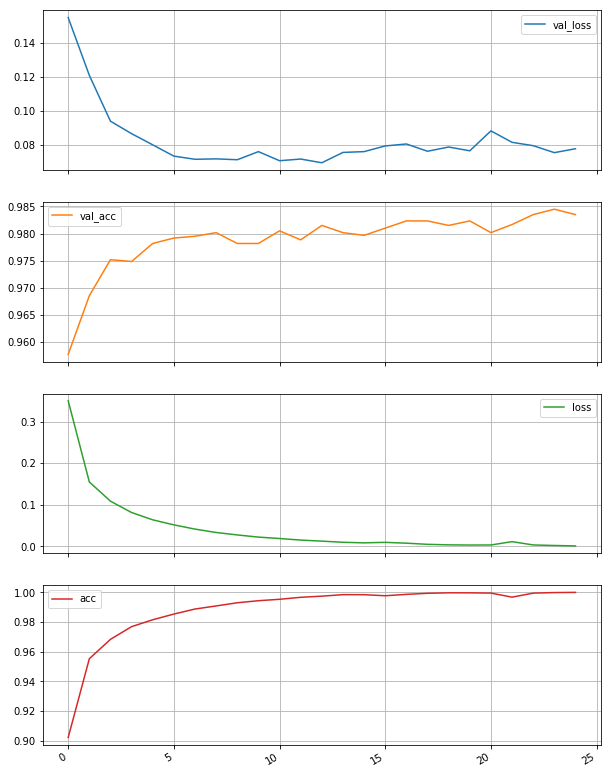

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
df_his = pd.DataFrame(history.history)
df_his.plot(subplots=True, grid=True, figsize=(10,15))
plt.savefig("NNgraph.png")

## USPS DNN Testing results

In [117]:
usps_DNN_preds = model.predict(usps_x_test)
dnn_tester(usps_DNN_preds, usps_y_test )

Total count:19999
Correct count:8924
Wrong count:11075
Accuracy :44.62223111155558 %
[[ 579.   25.   27.   16.    9.   21.   80.   17.  114.    7.]
 [   7.  442.    9.   29.   66.   22.   23.   63.    9.   49.]
 [ 259.  579. 1666.  346.  172.  528.  564.  272.  269.  164.]
 [ 101.   69.   59. 1235.   23.  149.   36.  212.  317.  213.]
 [  68.  177.   10.    3.  939.    9.   35.   23.  118.  101.]
 [  70.   49.   62.  247.   47. 1068.   89.   15.  182.   15.]
 [ 191.   23.   86.   17.   36.   71.  894.   16.  125.    7.]
 [ 321.  481.   41.   48.  393.   60.   67. 1201.  198.  874.]
 [ 192.   98.   30.   46.  267.   64.   22.  176.  637.  307.]
 [ 212.   57.    9.   13.   48.    8.  190.    5.   31.  263.]]


# Ensemble using Majority Voting

In [118]:
print("Done")
from scipy import stats

Done


### Ensemble results for MNIST Data

In [128]:
# log_reg_pred, svm_1_3_pred, RF_preds, DNN_preds
log_reg_pred_np=np.asarray(log_reg_pred)
DNN_predss =np.array(np.argmax(DNN_preds, axis=1, out=None))
usps_log_reg_pred_np=np.asarray(usps_log_reg_pred)
usps_DNN_predss =np.array(np.argmax(usps_DNN_preds, axis=1, out=None))

testing_target1 = testing_target.copy()
ensemble_list= [log_reg_pred_np, svm_1_3_pred, RF_preds, DNN_predss]

#ensemble_list= [usps_log_reg_pred_np, usps_svm_1_3_pred, usps_RF_preds, usps_DNN_predss]
#testing_target1 = USPS_tar_np.copy()





#ensemble_mode_val=np.zeros((10000))
ensemble_mode_val=[]

len(log_reg_pred)
for i in range(len(log_reg_pred)):
    cur_vec = [ensemble_list[0][i], ensemble_list[1][i], ensemble_list[2][i], ensemble_list[3][i]]
    mode_vecc = stats.mode(cur_vec)[0]
    #print(mode_vecc)
    ensemble_mode_val.insert(i,(mode_vecc[0]).tolist())
    #print(mode_vecc[0].)
ensemble_mode_val_np=np.asarray(ensemble_mode_val)
#print(type(ensemble_mode_val))
#print(ensemble_mode_val_np)







wrong=0
correct=0
tot=0
ensemble_confusion_matrix=np.zeros((10,10))


for ele, tar in zip(ensemble_mode_val_np[:10000], testing_target1[:10000]):
    tot+=1
    #print("Predicted: "+str(ele)+"  "+"Actual: "+str(tar))
    #print(int(ele))
    ensemble_confusion_matrix[int(ele)][int(tar)]+=1
    if (ele==tar):
        correct+=1
    else:
        wrong+=1
print("Ensemble  Result for MNIST Data")
print("Total count:"+str(tot))
print("Correct count:"+str(correct))
print("Wrong count:"+str(wrong))
print("Accuracy :"+str((correct/tot)*100)+" %")        
np.set_printoptions(precision=0, suppress=True)
#rf_confusion_matrix.astype(int)
print(ensemble_confusion_matrix)


Ensemble  Result for MNIST Data
Total count:10000
Correct count:9635
Wrong count:365
Accuracy :96.35000000000001 %
[[ 974.    0.    6.    1.    1.    9.    7.    2.    5.    7.]
 [   0. 1127.    2.    0.    0.    2.    3.    5.    2.    7.]
 [   1.    2. 1000.   15.    6.    0.    3.   20.    7.    2.]
 [   1.    1.    4.  976.    0.   27.    1.    7.   16.   10.]
 [   0.    0.    2.    0.  960.    4.    5.    2.    5.   18.]
 [   1.    1.    1.    5.    0.  835.   10.    0.   16.    3.]
 [   1.    2.    3.    0.    3.    4.  928.    0.    7.    0.]
 [   1.    1.    7.    5.    0.    1.    0.  983.    6.   13.]
 [   1.    1.    6.    7.    2.    8.    1.    1.  905.    2.]
 [   0.    0.    1.    1.   10.    2.    0.    8.    5.  947.]]


### Ensemble results for USPS Data

In [141]:
# log_reg_pred, svm_1_3_pred, RF_preds, DNN_preds
log_reg_pred_np=np.asarray(log_reg_pred)
DNN_predss =np.array(np.argmax(DNN_preds, axis=1, out=None))
usps_log_reg_pred_np=np.asarray(usps_log_reg_pred)
usps_DNN_predss =np.array(np.argmax(usps_DNN_preds, axis=1, out=None))

#testing_target1 = testing_target.copy()
#ensemble_list= [log_reg_pred_np, svm_1_3_pred, RF_preds, DNN_predss]

ensemble_list= [usps_log_reg_pred_np, usps_svm_1_3_pred, usps_RF_preds, usps_DNN_predss]
testing_target1 = USPS_tar_np.copy()





#ensemble_mode_val=np.zeros((10000))
ensemble_mode_val=[]

len(log_reg_pred)
for i in range(19999):
    cur_vec = [ensemble_list[0][i], ensemble_list[1][i], ensemble_list[2][i], ensemble_list[3][i], ]
    mode_vecc = stats.mode(cur_vec)[0]
    #print(mode_vecc)
    ensemble_mode_val.insert(i,(mode_vecc[0]).tolist())
    #print(mode_vecc[0].)
ensemble_mode_val_np=np.asarray(ensemble_mode_val)
#print(type(ensemble_mode_val))
#print(ensemble_mode_val_np)







wrong=0
correct=0
tot=0
ensemble_confusion_matrix=np.zeros((10,10))


for ele, tar in zip(ensemble_mode_val_np, testing_target1):
    tot+=1
    #print("Predicted: "+str(ele)+"  "+"Actual: "+str(tar))
    #print(int(ele))
    ensemble_confusion_matrix[int(ele)][int(tar)]+=1
    if (ele==tar):
        correct+=1
    else:
        wrong+=1
print("Ensemble  Result for USPS Data")
print("Total count:"+str(tot))
print("Correct count:"+str(correct))
print("Wrong count:"+str(wrong))
print("Accuracy :"+str((correct/tot)*100)+" %")        
np.set_printoptions(precision=0, suppress=True)
#rf_confusion_matrix.astype(int)
print(ensemble_confusion_matrix)

Ensemble  Result for USPS Data
Total count:19999
Correct count:7565
Wrong count:12434
Accuracy :37.82689134456723 %
[[ 812.  148.  232.  105.   69.  197.  425.  170.  293.   51.]
 [  10.  486.   32.   19.  129.   24.   20.  263.   34.  198.]
 [ 366.  419. 1478.  345.  136.  477.  678.  342.  304.  244.]
 [  93.  270.   72. 1318.   94.  253.   46.  446.  408.  555.]
 [ 257.  239.   23.    4. 1067.   27.   63.   36.   88.  136.]
 [  93.   63.   78.  164.  106.  955.  131.   93.  502.   69.]
 [  43.   18.   26.    1.    9.   18.  585.   11.   54.    2.]
 [  97.  302.   38.   21.  224.   35.   17.  523.   56.  439.]
 [  44.   53.   13.   21.  144.   10.    3.  109.  244.  209.]
 [ 185.    2.    7.    2.   22.    4.   32.    7.   17.   97.]]
